In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import *
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.ensemble import *
import xgboost as xgb
from sklearn.isotonic import IsotonicRegression
from sklearn.multioutput import MultiOutputRegressor
from sklearn.neighbors import KNeighborsRegressor,RadiusNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor

from keras.models import Sequential
from keras.layers import Dense, Activation, Dropout
from keras.optimizers import Adam


In [4]:
sim_df = pd.read_csv("../data/data_intermediaire/sim_ref_data_7.csv")

<AxesSubplot:>

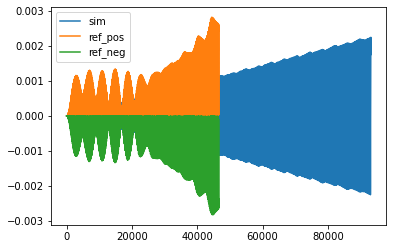

In [5]:
sim_df.plot()

In [6]:
print(sim_df[sim_df.sim >= 0].shape)
print(sim_df[sim_df.sim < 0].shape)

(46474, 3)
(46638, 3)


In [7]:
sim_pos = sim_df[sim_df.sim >= 0].sim.values
ref_pos = sim_df["ref_pos"].dropna().values

In [8]:
print(sim_pos.shape)
print(ref_pos.shape)

(46474,)
(46563,)


In [9]:
ref_pos = ref_pos[:sim_pos.shape[0]]
print(ref_pos.shape)

(46474,)


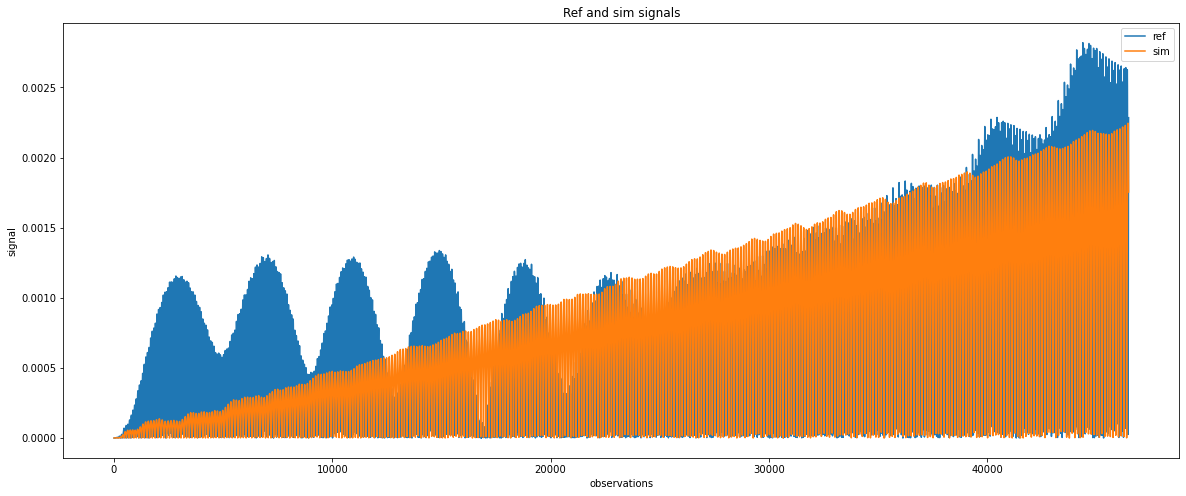

In [10]:
plt.figure(figsize = (20,8))
plt.plot(ref_pos, label = "ref")
plt.plot(sim_pos, label = "sim")
plt.title("Ref and sim signals")
plt.xlabel("observations")
plt.ylabel("signal")
plt.legend()
plt.show()

# Train test split

**80% Train-20% Test**

In [11]:
X_train = sim_pos[:int(len(sim_pos) * 0.8)]
X_test = sim_pos[int(len(sim_pos) * 0.8):]
y_train = ref_pos[:int(len(ref_pos) * 0.8)]
y_test = ref_pos[int(len(ref_pos) * 0.8):]

In [12]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(37179,)
(9295,)
(37179,)
(9295,)


In [13]:
#XX_Train,yy_train,yy_test,xx_test = train_test_split(sim_pos,ref_pos,test_size = 0.2,random_state = 0, shuffle = False)

In [14]:
def root_mean_squared_error(y_test,y_pred):
    """
    Calcule le root_mean_squared_error (RMSE)
    
    Paramètres
    ----------
    y_test
    y_pred
    
    Return
    ------
    
    RMSE
    

    """
    return np.sqrt(mean_squared_error(y_test,y_pred))

In [15]:
X_train = X_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)

# Entrainement modèle Random Forest

In [16]:
reg = RandomForestRegressor()

In [17]:
reg.fit(X_train,y_train)

RandomForestRegressor()

In [18]:
y_pred = reg.predict(X_test)

In [19]:
reg.score(X_test,y_test)
print(mean_squared_error(y_test,y_pred))
print(root_mean_squared_error(y_test,y_pred))
print(mean_absolute_error(y_test,y_pred))

8.780489473037493e-07
0.000937042660343567
0.0007770820394023489


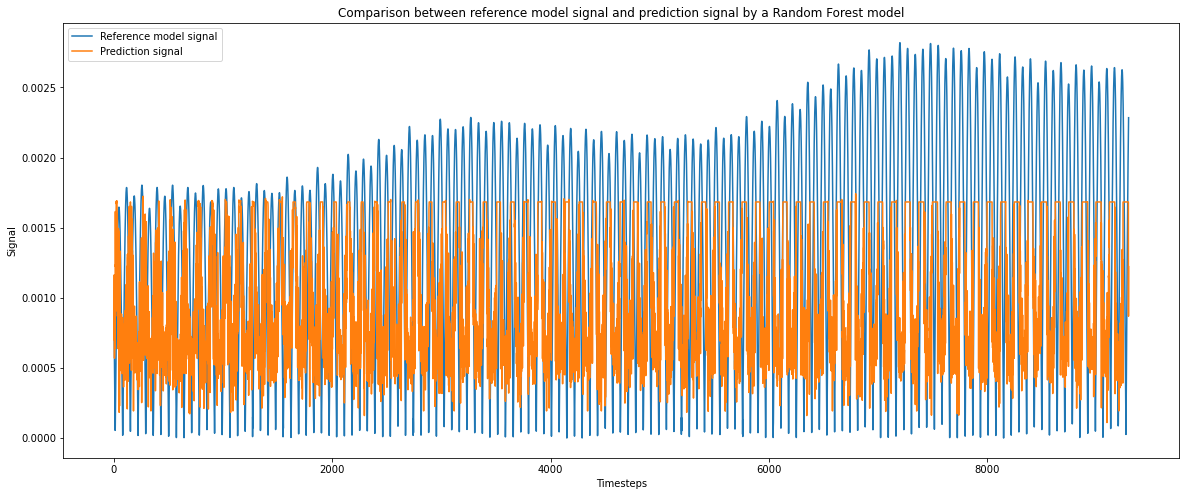

In [21]:
plt.figure(figsize = (20,8))
plt.plot(y_test, label = "Reference model signal")
plt.plot(y_pred, label = "Prediction signal")
plt.title("Comparison between reference model signal and prediction signal by a Random Forest model")
plt.xlabel("Timesteps")
plt.ylabel("Signal")
plt.legend()
plt.show()